## importing book

In [ ]:
!python --version

Python 3.10.0


In [ ]:
import requests

url = 'https://www.gutenberg.org/files/244/244-0.txt'
response = requests.get(url)

# givngencoding
response.encoding = 'utf-8'

# Check if the request was successful
if response.status_code == 200:
    # Get the book text from the response
    book_text = response.text

    # Indent the with block correctly under the if statement
    with open(file='book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
        print('book downloaded')
        print("Book text fetched successfully!")
        f.write(book_text) # added the file write
else:
    print("Failed to fetch book text.")
book_text = response.text

book downloaded
Book text fetched successfully!


In [ ]:
book_text[:1000]

'\ufeffThe Project Gutenberg eBook of A Study In Scarlet, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Study In Scarlet\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nRelease Date: April, 1995 [eBook #244]\r\n[Most recently updated: April 18, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Roger Squires and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I.

## stripping content of book between start and end
### means removing header footer metadata

In [ ]:

#def remove_header_footer_metadata():
start_marker="*** START OF THE PROJECT GUTENBERG EBOOK"
end_marker="*** END OF THE PROJECT GUTENBERG EBOOK"

start_index=book_text.find(start_marker)+len(start_marker)

end_index=book_text.find(end_marker)

cleaned_text=book_text[start_index:end_index].strip()

print('remove metadata header and footer')


remove metadata header and footer


In [ ]:
# remove_header_footer_metadata()

In [ ]:
cleaned_text[:1000]

'A STUDY IN SCARLET ***\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET\r\n\r\nBy A. Conan Doyle\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n A STUDY IN SCARLET.\r\n\r\n PART I.\r\n CHAPTER I. MR. SHERLOCK HOLMES.\r\n CHAPTER II. THE SCIENCE OF DEDUCTION.\r\n CHAPTER III. THE LAURISTON GARDENS MYSTERY\r\n CHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\r\n CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\r\n CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\r\n CHAPTER VII. LIGHT IN THE DARKNESS.\r\n\r\n PART II. THE COUNTRY OF THE SAINTS\r\n CHAPTER I. ON THE GREAT ALKALI PLAIN.\r\n CHAPTER II. THE FLOWER OF UTAH.\r\n CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\r\n CHAPTER IV. A FLIGHT FOR LIFE.\r\n CHAPTER V. THE AVENGING ANGELS.\r\n CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\r\n CHAPTER VII. THE CONCLUSION.\r\n\r\n\r\n\r\n\r\nA STUDY IN SCARLET.\r\n\r\n\r\n\r\n\r\nPART I.\r\n\r\n\r\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\r\n_Late of the Army Medical De

## removing extra spaces , non ascii characters  and spcial characters

In [ ]:
import re

# Remove extra spaces, special symbols, and non-ASCII characters
# Replace multiple spaces with a single space
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
# Remove non-ASCII characters
cleaned_text = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_text)
# Remove special symbols except basic punctuation
cleaned_text = re.sub(r'[^\w\s.,!?]', '', cleaned_text)

print("Unwanted characters removed!")

Unwanted characters removed!


In [ ]:
cleaned_text[:1000]


'A STUDY IN SCARLET  A STUDY IN SCARLET By A. Conan Doyle CONTENTS A STUDY IN SCARLET. PART I. CHAPTER I. MR. SHERLOCK HOLMES. CHAPTER II. THE SCIENCE OF DEDUCTION. CHAPTER III. THE LAURISTON GARDENS MYSTERY CHAPTER IV. WHAT JOHN RANCE HAD TO TELL. CHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR. CHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO. CHAPTER VII. LIGHT IN THE DARKNESS. PART II. THE COUNTRY OF THE SAINTS CHAPTER I. ON THE GREAT ALKALI PLAIN. CHAPTER II. THE FLOWER OF UTAH. CHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET. CHAPTER IV. A FLIGHT FOR LIFE. CHAPTER V. THE AVENGING ANGELS. CHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D. CHAPTER VII. THE CONCLUSION. A STUDY IN SCARLET. PART I. _Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D., _Late of the Army Medical Department._ CHAPTER I. MR. SHERLOCK HOLMES. In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded to Netley to go through the course pres

In [ ]:
cleaned_text=cleaned_text[861:]


In [ ]:
#in lower
cleaned_text=cleaned_text.lower()

In [ ]:
cleaned_text[:1000]

'in the year 1878 i took my degree of doctor of medicine of the university of london, and proceeded to netley to go through the course prescribed for surgeons in the army. having completed my studies there, i was duly attached to the fifth northumberland fusiliers as assistant surgeon. the regiment was stationed in india at the time, and before i could join it, the second afghan war had broken out. on landing at bombay, i learned that my corps had advanced through the passes, and was already deep in the enemy s country. i followed, however, with many other officers who were in the same situation as myself, and succeeded in reaching candahar in safety, where i found my regiment, and at once entered upon my new duties. the campaign brought honours and promotion to many, but for me it had nothing but misfortune and disaster. i was removed from my brigade and attached to the berkshires, with whom i served at the fatal battle of maiwand. there i was struck on the shoulder by a jezail bullet

In [ ]:
    with open(file='text_book.txt', mode='w', encoding='utf-8') as f: # Fixed the file name to be a string. The 'w' should also be a string.
        print('clean book downloaded')

        f.write(book_text) # added the file write

clean book downloaded


## stopwords removal

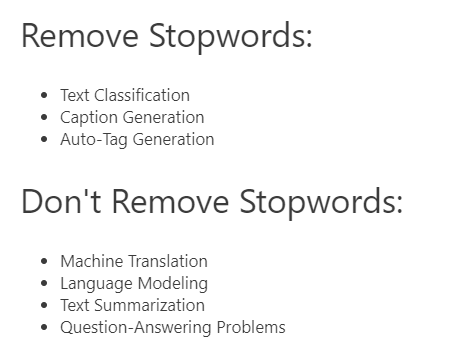

## wordcloud

In [ ]:
!pip install wordcloud

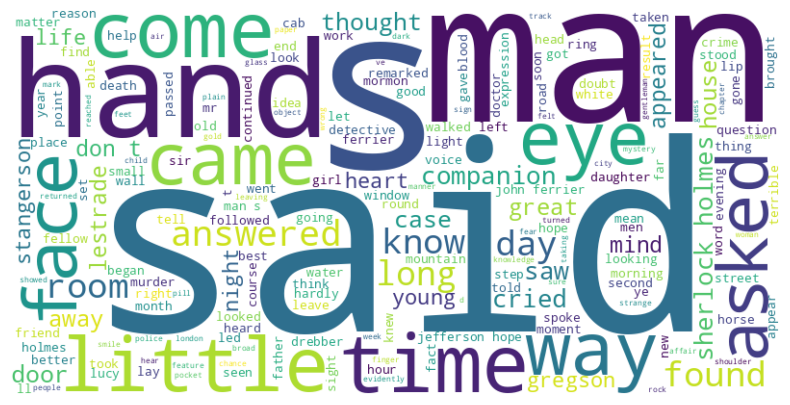

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## NER

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_trf

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------- -------------- 0.8/1.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 7.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\USER\Downloads\aiml\venv\python.exe -m pip install -U pip setuptools wheel


     ---------------------------------------- 0.0/457.4 MB ? eta -:--:--
     --------------------------------------- 2.1/457.4 MB 11.7 MB/s eta 0:00:39
     --------------------------------------- 3.9/457.4 MB 10.2 MB/s eta 0:00:45
      -------------------------------------- 6.3/457.4 MB 10.7 MB/s eta 0:00:43
      -------------------------------------- 8.7/457.4 MB 11.0 MB/s eta 0:00:41
      ------------------------------------- 10.5/457.4 MB 11.1 MB/s eta 0:00:41
      -------------------------------------- 11.0/457.4 MB 9.2 MB/s eta 0:00:49
     - ------------------------------------- 13.4/457.4 MB 9.5 MB/s eta 0:00:47
     - ------------------------------------- 15.7/457.4 MB 9.8 MB/s eta 0:00:46
     - ------------------------------------ 18.4/457.4 MB 10.1 MB/s eta 0:00:44
     - ------------------------------------ 20.4/457.4 MB 10.2 MB/s eta 0:00:43
     - ------------------------------------- 21.0/457.4 MB 9.9 MB/s eta 0:00:45
     - ------------------------------------- 21

In [ ]:
import spacy
import pandas as pd
import json

# Load spaCy transformer model
nlp = spacy.load("en_core_web_trf")

# Sample book text
book_text =cleaned_text
# Process text with spaCy
doc = nlp(book_text)

# Extract character names (NER detects "PERSON" entities)
characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])

# Convert to DataFrame
df = pd.DataFrame(characters, columns=["Character Name"])

# Convert to JSON format for Mistral AI
character_json = df.to_json(orient="records", indent=4)

# Output
print("Detected Characters:\n", df)
print("\nJSON Output for AI Fine-Tuning:\n", character_json)

# Save JSON file
with open("characters.json", "w") as f:
    f.write(character_json)


Detected Characters:
               Character Name
0                     dolsky
1         madame charpentier
2                   johnston
3                    gregson
4              harry murcher
..                       ...
105                    sally
106                   arthur
107              mendelssohn
108  edgar allen poe s dupin
109                   samson

[110 rows x 1 columns]

JSON Output for AI Fine-Tuning:
 [
    {
        "Character Name":"dolsky"
    },
    {
        "Character Name":"madame charpentier"
    },
    {
        "Character Name":"johnston"
    },
    {
        "Character Name":"gregson"
    },
    {
        "Character Name":"harry murcher"
    },
    {
        "Character Name":"gaboriau"
    },
    {
        "Character Name":"lestrade"
    },
    {
        "Character Name":"brigham young"
    },
    {
        "Character Name":"lucy ferrier"
    },
    {
        "Character Name":"john ferrier s"
    },
    {
        "Character Name":"leturier"
    },
    

In [ ]:
from spacy import displacy
displacy.render(doc[:250] ,style='ent',jupyter=True)


In [ ]:
import spacy
import re
import pandas as pd
import json

# Load spaCy's transformer-based NER model
nlp = spacy.load("en_core_web_trf")

# Sample book text (Replace this with your full book text)
book_text =cleaned_text

# Process text with spaCy
doc = nlp(book_text)

# Extract character names using NER (excluding false positives)
characters = set()
for ent in doc.ents:
    if ent.label_ == "PERSON" and len(ent.text.split()) < 3:  # Avoid long entity names
        characters.add(ent.text)

# Regex pattern to detect direct speech
direct_speech_pattern = r'["“]([^"”]+)["”]'

# Find all dialogues
matches = re.findall(direct_speech_pattern, book_text)

# Improved speaker detection
speaker_dialogues = []
prev_speaker = None

for match in matches:
    speaker = None
    before_dialogue = book_text.split(match)[0][-100:]  # Get context before the dialogue

    # Look for speaker names before dialogue
    for character in characters:
        if re.search(rf"{character} (said|asked|replied|remarked|shouted|whispered)", before_dialogue, re.IGNORECASE):
            speaker = character
            prev_speaker = speaker  # Store last detected speaker

    # If no speaker detected, assume the previous one
    if not speaker:
        speaker = prev_speaker

    speaker_dialogues.append({"speaker": speaker, "dialogue": match})

# Convert to DataFrame
df = pd.DataFrame(speaker_dialogues)

# Convert to JSON for Mistral AI fine-tuning
json_output = df.to_json(orient="records", indent=4)

# Save JSON file
with open("character_dialogues.json", "w") as f:
    f.write(json_output)

# Output Results
print("\nDetected Speakers & Dialogues:\n", df)
print("\nJSON Output for AI Fine-Tuning:\n", json_output)



Detected Speakers & Dialogues:
 Empty DataFrame
Columns: []
Index: []

JSON Output for AI Fine-Tuning:
 [

]


In [ ]:
import spacy
import re
import pandas as pd
import json

# Load spaCy transformer model
nlp = spacy.load("en_core_web_trf")

# Load full book text
with open("text_book.txt", "r", encoding="utf-8") as f:
    cleaned_text = f.read()

# Process with spaCy
doc = nlp(book_text)

# Extract characters (PERSON entities)
characters = set(ent.text for ent in doc.ents if ent.label_ == "PERSON")

# Regex pattern to extract direct speech
dialogue_pattern = r'["“]([^"”]+)["”]'

# Find all dialogues
matches = re.findall(dialogue_pattern, cleaned_text)

# Improved speaker detection
speaker_dialogues = []
prev_speaker = None

for match in matches:
    speaker = None
    before_dialogue = book_text.split(match)[0][-300:]  # Get more context

    # Detect speaker before dialogue
    for character in characters:
        if re.search(rf"{character} (said|asked|replied|muttered|exclaimed)", before_dialogue, re.IGNORECASE):
            speaker = character
            prev_speaker = speaker  # Store last detected speaker

    # If no speaker detected, assume the previous one
    if not speaker:
        speaker = prev_speaker

    speaker_dialogues.append({"speaker": speaker, "dialogue": match})

# Convert to DataFrame
df = pd.DataFrame(speaker_dialogues)

# Convert to JSON for AI fine-tuning
json_output = df.to_json(orient="records", indent=4)

# Save JSON file
with open("character_dialogues.json", "w") as f:
    f.write(json_output)

# Output results
print("\nDetected Speakers & Dialogues:\n", df.head(10))  # Show first 10
print("\nJSON Output for AI Fine-Tuning:\n", json_output[:500])  # Preview JSON



Detected Speakers & Dialogues:
   speaker                                           dialogue
0    None                                           Orontes,
1    None  Whatever have you been doing with yourself, Wa...
2    None   You are as thin as a lath and as brown as a nut.
3    None                                        Poor devil!
4    None                            What are you up to now?
5    None                              Looking for lodgings,
6    None  Trying to solve the problem as to\n\nwhether i...
7    None                            That’s a strange thing,
8    None  you are the second\n\nman to-day that has used...
9    None                             And who was the first?

JSON Output for AI Fine-Tuning:
 [
    {
        "speaker":null,
        "dialogue":"Orontes,"
    },
    {
        "speaker":null,
        "dialogue":"Whatever have you been doing with yourself, Watson?"
    },
    {
        "speaker":null,
        "dialogue":"You are as thin as a lath and as 

In [ ]:
df.head(10)

,speaker,dialogue
0,None,"Orontes,"
1,None,"Whatever have you been doing with yourself, Wa..."
2,None,You are as thin as a lath and as brown as a nut.
3,None,Poor devil!
4,None,What are you up to now?
5,None,"Looking for lodgings,"
6,None,Trying to solve the problem as to\n\nwhether i...
7,None,"That’s a strange thing,"
8,None,you are the second\n\nman to-day that has used...
9,None,And who was the first?


In [ ]:
import spacy
import re
import json

# Load spaCy model with Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_trf")  # Transformer model for better accuracy

# Input text (replace with your book text)
text = """
'You have been in Afghanistan, I perceive,' said Sherlock Holmes.
'How on earth did you know that?' I asked in astonishment.
'Never mind,' said he, chuckling to himself.
"""

# Apply NLP processing
doc = nlp(text)

# Step 1: Detect Character Names
characters = set()
for ent in doc.ents:
    if ent.label_ in ["PERSON"]:
        characters.add(ent.text)

# Step 2: Extract Dialogue
dialogues = []
matches = re.findall(r"(['\"])(.*?)\1\s*(?:said|asked|replied)\s+(\w+)", text, re.IGNORECASE)

# Step 3: Structure the Output
for match in matches:
    quote, dialogue, speaker = match
    if speaker in characters:  # Ensure the detected speaker is valid
        dialogues.append({"speaker": speaker, "dialogue": dialogue})

# Step 4: Convert to JSON format
json_output = json.dumps(dialogues, indent=4)

# Print result
print(json_output)
